In [1]:
%load_ext autoreload
%autoreload 2

In [39]:
import os

import numpy as np
from scipy.signal import convolve2d

from templatematching.utils import load_patches, read_norm_img
from templatematching.models.utils import make_template_mass

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
patches, labels = load_patches(1000)

# Average model (A) TEST

(1.729179140978081e-05, 0.00011629973486087333)

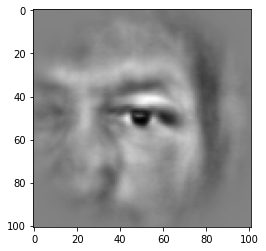

In [5]:
from templatematching.models.averager import Averager
avg = Averager()
avg.train(patches, n_order=16)

# Display template
plt.imshow(avg.template, cmap='gray')
np.mean(avg.template), np.std(avg.template)

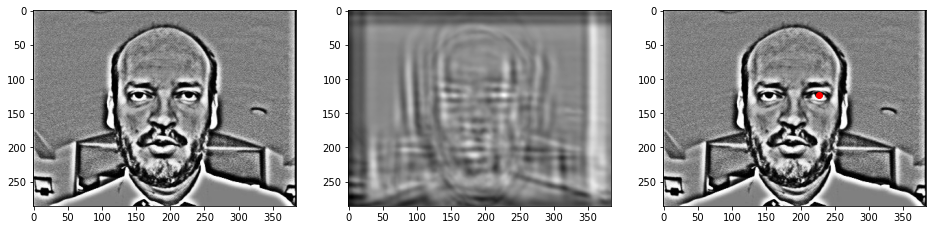

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
image = read_norm_img(17)

conv, (x, y) = avg.predict_im(image, ax3)

ax1.imshow(image, cmap='gray')
ax2.imshow(conv, cmap='gray')

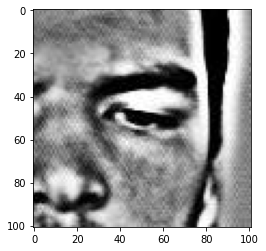

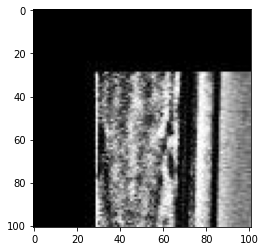

In [7]:
plt.imshow(patches[0], cmap='gray')
plt.show()

plt.imshow(patches[-1], cmap='gray')
plt.show()

# Ridge Model

In [9]:
from templatematching.models import R2Ridge
clf = R2Ridge(template_shape=(51, 51), mu=1e7, spline_order=3)
clf.fit(X=patches, y=labels)

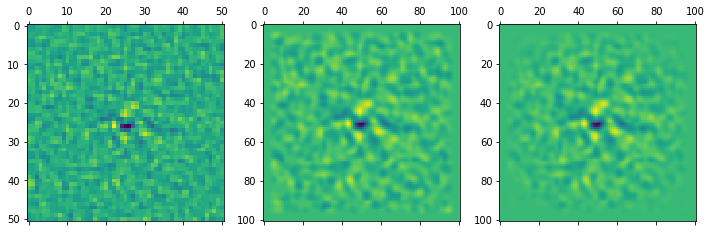

In [38]:
final_template = clf.reconstruct_template()
mask = make_template_mass(int(patches.shape[1]/2))

f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))
ax1.matshow(clf.spline_coef.reshape(51, 51))
ax2.matshow(final_template);
ax3.matshow(mask * final_template);

## Function interopolation
@clement: what is this?

In [46]:
from scipy.interpolate import bisplrep
from scipy.interpolate import bisplev

In [ ]:
x, y = np.mgrid[-1:1:101j, -1:1:101j]

#x, y = np.meshgrid(x, y)
tck = bisplrep(x, y, temp, s=0)

x, y = np.mgrid[-1:1:202j, -1:1:202j]

#x_new, y_new = np.meshgrid(x_new, y_new)

inter = bisplev(x_new[:,0], y_new[0,:], tck)

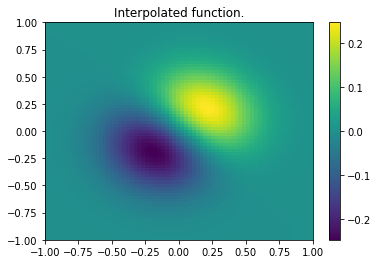

In [221]:
x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))

xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]
tck = bisplrep(x, y, z, s=0)
znew = bisplev(xnew[:,0], ynew[0,:], tck)

plt.figure()
plt.pcolor(xnew, ynew, znew)
plt.colorbar()
plt.title("Interpolated function.")
plt.show()